In [1]:
import sympy
sympy.init_printing()
from sympy import I, pi, oo

# Series

In [2]:
x, y = sympy.symbols("x, y")
f = sympy.Function("f")(x)
sympy.series(f, x)

                             ⎛  2      ⎞│         ⎛  3      ⎞│         ⎛  4   
                           2 ⎜ d       ⎟│       3 ⎜ d       ⎟│       4 ⎜ d    
                          x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(
                             ⎜  2      ⎟│         ⎜  3      ⎟│         ⎜  4   
         ⎛d       ⎞│         ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│ξ=0      ⎝dξ    
f(0) + x⋅⎜──(f(ξ))⎟│    + ────────────────── + ────────────────── + ──────────
         ⎝dξ      ⎠│ξ=0           2                    6                    24

   ⎞│         ⎛  5      ⎞│           
   ⎟│       5 ⎜ d       ⎟│           
ξ))⎟│      x ⋅⎜───(f(ξ))⎟│           
   ⎟│         ⎜  5      ⎟│           
   ⎠│ξ=0      ⎝dξ       ⎠│ξ=0    ⎛ 6⎞
──────── + ────────────────── + O⎝x ⎠
                  120                

### To change the point around which the function is expanded, we specify the x0 argument as in the following example

> Here we also specified n=2, to request a series expansion with only terms up to
and including the second order

In [3]:
x0 = sympy.Symbol("{x_0}")
f.series(x, x0, n=2)

                       ⎛ d        ⎞│            ⎛           2           ⎞
f({x_0}) + (x - {x_0})⋅⎜───(f(ξ₁))⎟│         + O⎝(x - {x_0}) ; x → {x_0}⎠
                       ⎝dξ₁       ⎠│ξ₁={x_0}                             

>Note that the errors due to the truncated terms are
represented by the order object  (¼) . The order object is useful for keeping track of the
order of an expression when computing with series expansions, such as multiplying or
adding different expansions. However, for concrete numerical evolution, it is necessary
to remove the order term from the expression, which can be done using the method
removeO:

In [5]:
f.series(x, x0, n=2).removeO()

            ⎛ d        ⎞│                   
(x - {x_0})⋅⎜───(f(ξ₁))⎟│         + f({x_0})
            ⎝dξ₁       ⎠│ξ₁={x_0}           

> For example,
we can easily generate the well-known expansions of many standard mathematical
functions

In [6]:
sympy.cos(x).series()

In [7]:
sympy.sin(x).series()

In [8]:
sympy.exp(x).series()

I don't remember the rule for series sin,cos and e, but something pretty close

In [18]:
sympy.cos(x).series() + sympy.sin(x).series()

In [19]:
(1/(1+x)).series()

### we can express series for different variables

In [20]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))
expr.series(x, n=4)

In [21]:
expr.series(y, n=4)

## Limits

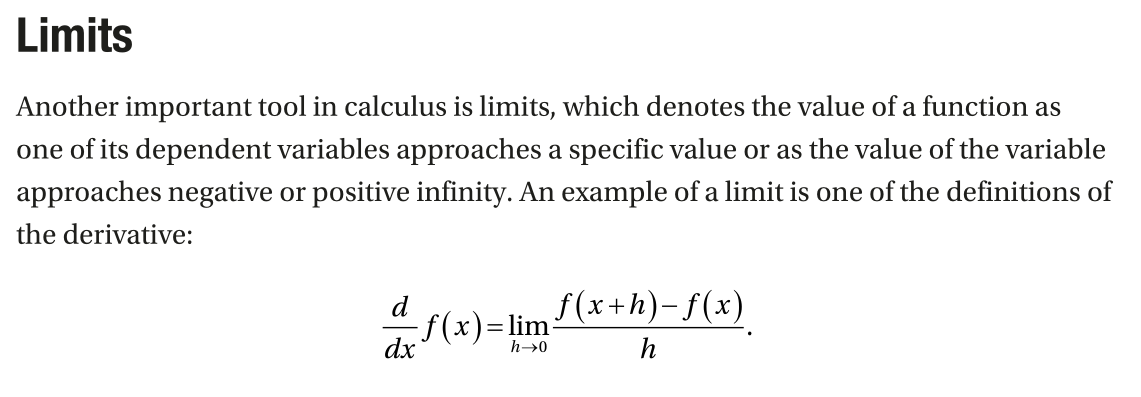

In [23]:
sympy.limit(sympy.sin(x) / x, x, 0)

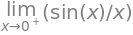

In [24]:
# or we can prepare and then run
l = sympy.Limit(sympy.sin(x) / x, x, 0)
l

In [25]:
l.doit()

In [27]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")

# create expression
diff_limit = (f(x + h) - f(x))/h

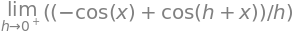

In [29]:
# prepare limit
l = sympy.Limit(diff_limit.subs(f, sympy.cos), h, 0)
l

In [31]:
# find limit
l.doit()

## Sums and Products

> After sympy.Sum or sympy.Product objects have been created, they can be
evaluated using the doit method

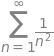

In [32]:
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, oo))
x

In [33]:
x.doit()

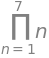

In [34]:
x = sympy.Product(n, (n, 1, 7))
x

In [35]:
x.doit()

In [36]:
x = sympy.Symbol("x")

sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()